# BlindCliffWalker comparison of different replay memory sampling strategies

In [1]:
import numpy as np
import pandas as pd
from liftoff.liftoff_results import collect_results

import altair as alt
alt.renderers.enable('notebook')
np.set_printoptions(linewidth=120, precision=3, suppress=True)

In [2]:
def get_data(experiment_name):
    result_paths = collect_results(experiment_name=experiment_name,
                                   results_dir='../results', 
                                   names=['results.msgpack'])
    result_paths = [p for p in result_paths if p[1]]
    result_data_frames = [pd.read_msgpack(f'{p[0]}/{p[1][0]}') for p in result_paths]

    return pd.concat(result_data_frames, ignore_index=True)

In [3]:
def get_plot(data=None, title='Undefined', y_scale='log', height=320):
    x_title = 'size of the experience replay as filled by a random policy'
    x_axis = alt.X('mem_size', scale=alt.Scale(type='log'), axis=alt.Axis(title=x_title))
    
    line = alt.Chart(data).mark_line(point=True).encode(
        x=x_axis,
        y='mean(optim_steps)',
        color=alt.Color('sampling_type', legend=alt.Legend(title="Sampling method")),
        tooltip=['mem_size', 'mean(optim_steps)', 'sampling_type'])

    confidence_interval = alt.Chart(data).mark_area(opacity=0.3).encode(
        x=x_axis,
        y=alt.Y('ci0(optim_steps)', axis=alt.Axis(title='optimisation steps'), scale=alt.Scale(type=y_scale)),
        y2='ci1(optim_steps)',
        color=alt.Color('sampling_type'))
    return (confidence_interval + line).properties(width=700, height=height, title=title)

In [4]:
def get_title(name):
    return ' '.join(name.split('_'))

In [5]:
experiments = ('rank_alpha_sweep', 'uniform_proportional_rank_greedy',
               'rank_batch_sweep', 'proportional_batch_alpha_sweep', 'baseline')
results = {name: {'data': get_data(name), 'title': get_title(name)} for name in experiments}

for name, val in results.items():
    print(name, val['data'].shape[0])

rank_alpha_sweep 2100
uniform_proportional_rank_greedy 1200
rank_batch_sweep 3000
proportional_batch_alpha_sweep 12000
baseline 1200


In [6]:
# get_plot(**results['uniform_vs_greedy_vs_rank'])
# get_plot(**results['uniform_vs_greedy_vs_rank'], y_scale='linear')

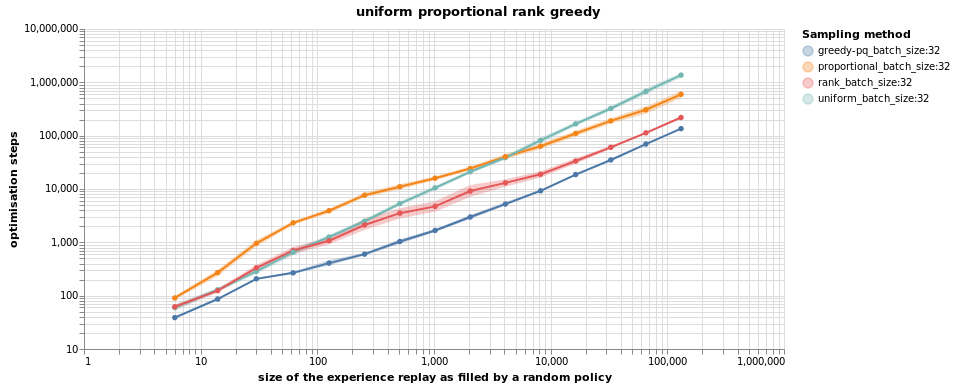

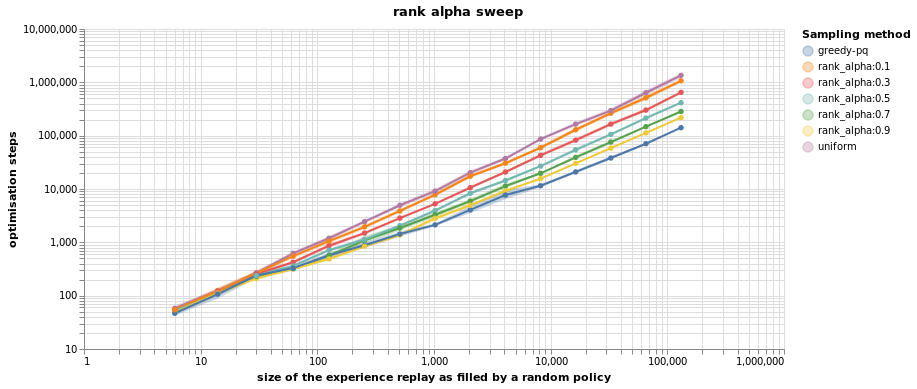

In [8]:
get_plot(**results['rank_alpha_sweep'])

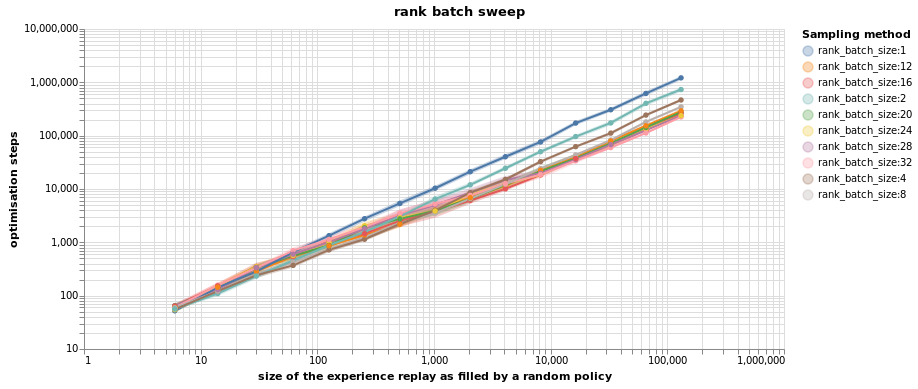

In [9]:
get_plot(**results['rank_batch_sweep'])

In [10]:
def filter_df(alpha=1):
    df_full = results['proportional_batch_alpha_sweep']['data']
    filter_by = [f'proportional_alpha:{alpha}_batch_size:{sz}' for sz in range(1, 32)]
    return df_full.loc[df_full['sampling_type'].isin(filter_by)]

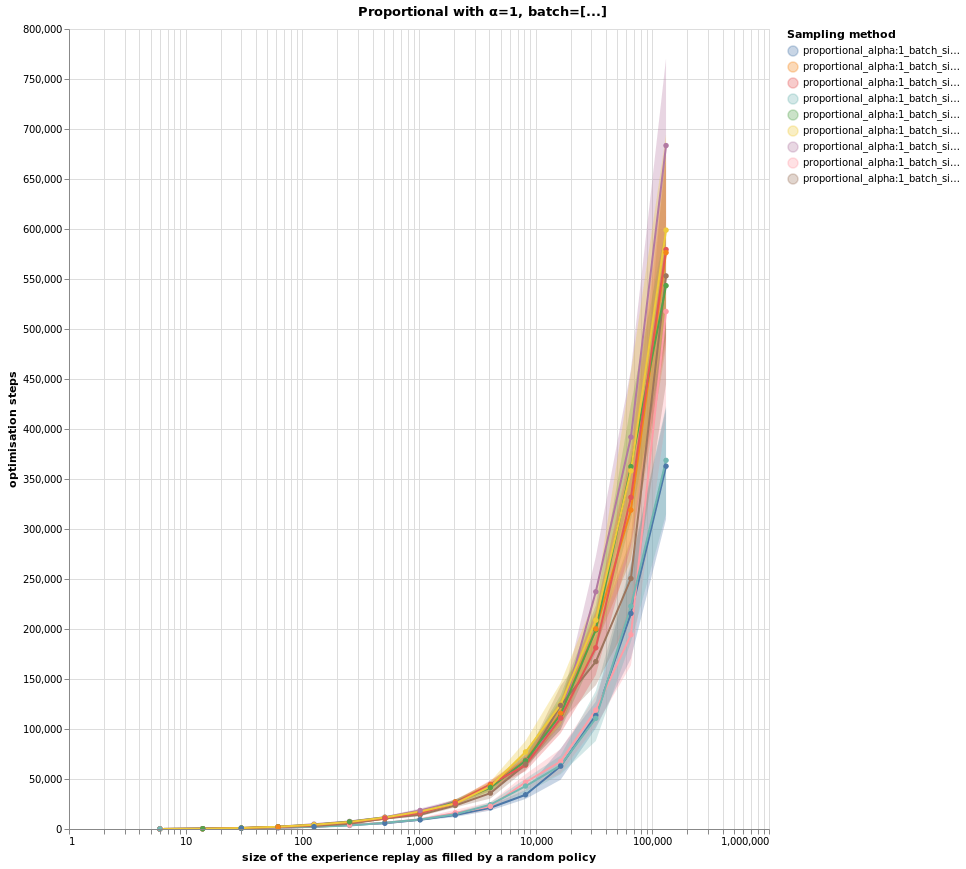

In [11]:
# proportional batch/alpha sweep
alpha = 1  # 0.4, 0.6, 0.8, 1
get_plot(data=filter_df(alpha=alpha), title=f'Proportional with α={alpha}, batch=[...]',
         y_scale='linear', height=800)

#get_plot(**results['proportional_batch_alpha_sweep'], height=800)

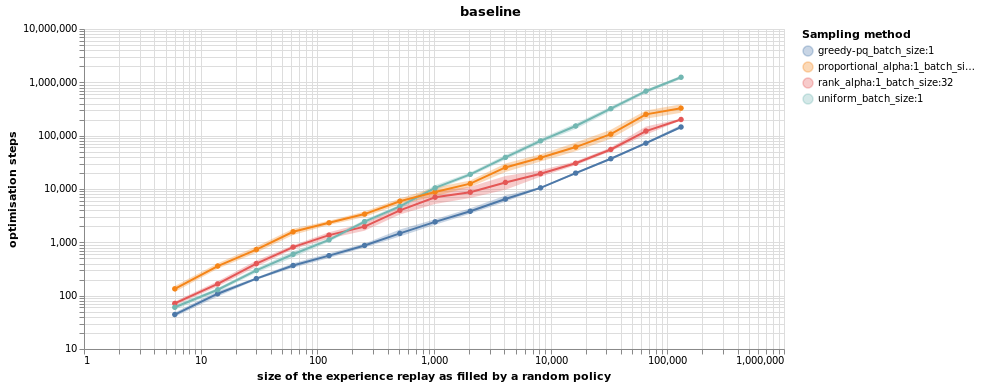

In [15]:
get_plot(**results['baseline'], y_scale='log')

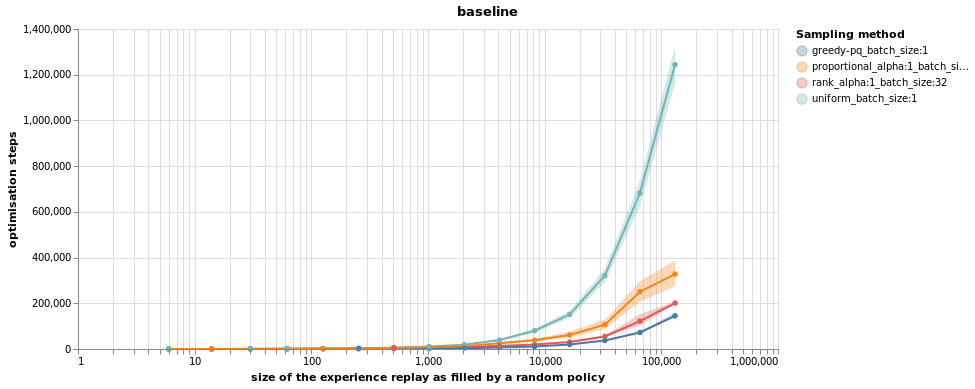

In [14]:
get_plot(**results['baseline'], y_scale='linear')